<a href="https://colab.research.google.com/github/TU22005/EU_M_Math/blob/main/Chap07_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

In [2]:
import requests, zipfile
from io import StringIO
import io

zip_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))

z.extractall()

In [3]:
dow = pd.read_csv('dow_jones_index.data',sep=',')

dow.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:

dow.date = pd.to_datetime(dow.date)

delete_dolchar = lambda x: str(x).replace('$', '')


dow.open = pd.to_numeric(dow.open.map(delete_dolchar))
dow.high = pd.to_numeric(dow.high.map(delete_dolchar))
dow.low = pd.to_numeric(dow.low.map(delete_dolchar))
dow.close = pd.to_numeric(dow.close.map(delete_dolchar))
dow.next_weeks_open = pd.to_numeric(dow.next_weeks_open.map(delete_dolchar))
dow.next_weeks_close = pd.to_numeric(dow.next_weeks_close.map(delete_dolchar))


In [5]:
dow.head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [6]:
dow_stock_index = dow.set_index(['date','stock'])


dow_stock_index_unstack = dow_stock_index.unstack()

dow_close_data = dow_stock_index_unstack['close']

dow_close_data.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [7]:
corr_data = dow_close_data.corr()


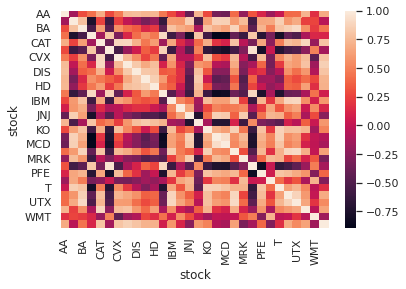

In [8]:
sns.heatmap(corr_data)

In [9]:
max_corr = 0
stock_1 = ''
stock_2 = ''

for i in range(0,len(corr_data)):
    print(
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    )
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

print('[Max Corr]:',max_corr)
print('[stock_1]:',stock_1)
print('[stock_2]:',stock_2)

AA DIS 0.7724697655620214
AXP KRFT 0.8735103611554017
BA UTX 0.9163379610743169
BAC HPQ 0.9058167680009366
CAT DD 0.9028558103078965
CSCO MSFT 0.9537216645891365
CVX CAT 0.8894156562923724
DD CAT 0.9028558103078965
DIS DD 0.8269258130241477
GE HD 0.8582069310150242
HD GE 0.8582069310150242
HPQ BAC 0.9058167680009366
IBM UTX 0.8975523835362522
INTC BA 0.6910939563692001
JNJ KRFT 0.8612879882611021
JPM GE 0.830450859436039
KO T 0.868995241583572
KRFT MCD 0.9299213037922904
MCD KRFT 0.9299213037922904
MMM UTX 0.9136955626526879
MRK JNJ 0.8440270438854454
MSFT CSCO 0.9537216645891365
PFE T 0.806543944675414
PG MRK 0.7497131367292437
T KO 0.868995241583572
TRV MMM 0.8917262016156643
UTX BA 0.9163379610743169
VZ CAT 0.8903147891825165
WMT PG 0.7237055485083286
XOM DD 0.8635107559399798
[Max Corr]: 0.9537216645891365
[stock_1]: CSCO
[stock_2]: MSFT


dow_close_data_subsets =dow_close_data[[stock_1,stock_2]]
dow_close_data_subsets.plot(subplots=True,grid=True)
plt.grid(True)

In [11]:
  dow_close_data.rolling(3).mean().head(5)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,16.060000,45.536667,70.376667,14.583333,93.496667,20.966667,92.600000,49.303333,39.493333,18.996667,...,35.160000,28.306667,18.346667,65.313333,28.536667,54.320000,79.453333,35.446667,54.873333,77.470000
2011-01-28,15.963333,45.370000,70.326667,14.366667,94.146667,20.953333,93.326667,49.480000,39.293333,19.586667,...,33.733333,28.023333,18.283333,65.213333,28.083333,55.146667,80.236667,35.346667,55.746667,78.603333
2011-02-04,16.353333,44.560000,70.763333,14.046667,96.006667,21.233333,94.753333,50.390000,39.766667,20.166667,...,33.286667,27.846667,18.603333,64.573333,27.930000,56.073333,81.383333,35.630000,56.153333,80.416667


max volatility: CSCO
min volatility: KO


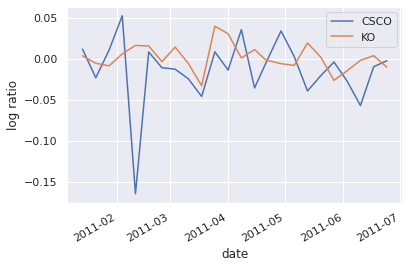

In [12]:
log_ratio_stock_close = np.log(dow_close_data/dow_close_data.shift(1))

max_vol_stock = log_ratio_stock_close.std().idxmax()
min_vol_stock = log_ratio_stock_close.std().idxmin()

print('max volatility:',max_vol_stock)
print('min volatility:',min_vol_stock)

log_ratio_stock_close[max_vol_stock].plot()
log_ratio_stock_close[min_vol_stock].plot()
plt.ylabel('log ratio')
plt.legend()
plt.grid(True)